In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import json

In [3]:
def readDocs(fileName, limit = -1):
    docs = []
    with open(fileName, 'r') as f:
        for i, line in enumerate(f):
            if limit != -1 and i > limit:
                break
            docs.append(json.loads(line))
    return pd.DataFrame.from_dict(docs)

In [4]:
sourceFile = '/yelp-data/yelp-reviews.json'
documentLimit = 50000
docs = readDocs(sourceFile, documentLimit)

print(docs.head())

              business_id  cool        date  funny               review_id  \
0  2aFiy99vNLklCx3T_tGS9A     0  2011-10-10      0  NxL8SIC5yqOdnlXCg18IBg   
1  2aFiy99vNLklCx3T_tGS9A     0  2010-12-29      0  pXbbIgOXvLuTi_SPs1hQEQ   
2  2aFiy99vNLklCx3T_tGS9A     0  2011-04-29      0  wslW2Lu4NYylb1jEapAGsw   
3  2LfIuF3_sX6uwe-IR-P0jQ     1  2014-07-14      0  GP6YEearUWrzPtQYSF1vVg   
4  2LfIuF3_sX6uwe-IR-P0jQ     0  2014-01-15      0  25RlYGq2s5qShi-pn3ufVA   

   stars                                               text    type  useful  \
0      5  If you enjoy service by someone who is as comp...  review       0   
1      5  After being on the phone with Verizon Wireless...  review       1   
2      5  Great service! Corey is very service oriented....  review       0   
3      5  Highly recommended. Went in yesterday looking ...  review       0   
4      4  I walked in here looking for a specific piece ...  review       0   

                  user_id  
0  KpkOkG6RIf4Ra25Lhhxf1A  


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression

def listMSE():
    mseX = []
    mseY = []
    tErr = []
    limits = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500]
    for limit in limits:
        vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english', max_features=limit, lowercase=True)
        sparse = vectorizer.fit_transform(docs["text"])
        x, x1, y, y1 = train_test_split(sparse, docs["stars"], test_size=15000, random_state=42)
        r = LinearRegression()
        r.fit(x, y)
        mse = np.mean((r.predict(x1) - y1) ** 2)
        tError = np.mean((r.predict(x) - y) ** 2)
        mseX.append(limit)
        mseY.append(mse)
        tErr.append(tError)
        print(limit, mse, tError)
        
    plt.plot(mseX, mseY, color='red', label="Test Error")
    plt.plot(mseX, tErr, color='blue', label="Train Error")
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    

# listMSE()

In [7]:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english', max_features=4000, lowercase=True)
sparse = vectorizer.fit_transform(docs["text"].values)
x_train, x_test, y_train, y_test = train_test_split(sparse, docs["stars"].values, test_size=15000, random_state=42)
print(sparse[:1])
print(vectorizer.get_feature_names()[:100])

  (0, 1188)	0.207145610224
  (0, 3108)	0.117523399854
  (0, 2555)	0.288399088532
  (0, 2840)	0.156021683559
  (0, 1698)	0.321583583246
  (0, 3574)	0.113295798892
  (0, 3293)	0.23905156791
  (0, 3932)	0.200129148163
  (0, 1189)	0.282322974115
  (0, 1735)	0.229997037298
  (0, 2332)	0.165523756967
  (0, 1937)	0.277644430936
  (0, 2348)	0.133118619887
  (0, 3847)	0.150095226639
  (0, 1167)	0.32905807413
  (0, 524)	0.286676459338
  (0, 3054)	0.266901082152
  (0, 283)	0.288574940575
[u'00', u'000', u'10', u'100', u'10pm', u'11', u'12', u'120', u'13', u'14', u'15', u'150', u'16', u'17', u'18', u'19', u'1st', u'20', u'200', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015', u'21', u'22', u'23', u'24', u'25', u'27', u'28', u'2nd', u'30', u'300', u'30pm', u'35', u'3rd', u'40', u'400', u'45', u'50', u'500', u'60', u'65', u'6pm', u'70', u'75', u'7pm', u'80', u'8pm', u'90', u'95', u'99', u'9pm', u'ab', u'abend', u'abends', u'aber', u'ability', u'able', u'absolut', u'absolute', u'absolut

In [8]:
regr = LinearRegression()
regr.fit(x_train, y_train)
mse = np.mean((regr.predict(x_test) - y_test) ** 2)

 # The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((regr.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

('Coefficients: \n', array([-0.76526884, -0.83587477,  0.10488822, ..., -0.36578787,
       -0.20797471,  0.70609066]))
Mean squared error: 0.89
Variance score: 0.57


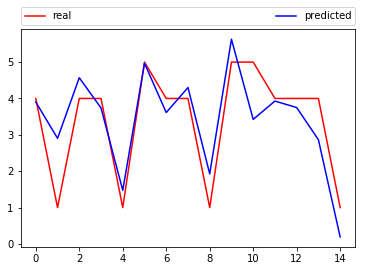

In [9]:
count = 15
plt.plot(y_test[:count], color='red', label="real")
plt.plot(regr.predict(x_test[:count]), color='blue', label="predicted")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)


In [ ]:
from sklearn.linear_model import enet_path
from itertools import cycle

vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english', lowercase=True)
sparse = vectorizer.fit_transform(docs["text"].values)
x_train, x_test, y_train, y_test = train_test_split(sparse, docs["stars"].values, test_size=15000, random_state=42)


eps = 5e-3
alphas_enet, coefs_enet, _ = enet_path(x_train, y_train, eps=eps, l1_ratio=0.8, fit_intercept=False)
plt.figure(1)
ax = plt.gca()

colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_enet = -np.log10(alphas_enet)
for coef_e, c in zip(coefs_enet, colors):
    l2 = plt.plot(neg_log_alphas_enet, coef_e, linestyle='--', c=c)

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Elastic-Net Paths')
plt.axis('tight')

In [18]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0.0001)
enet.fit(x_train, y_train)

 # The coefficients
print('Coefficients: \n', enet.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((enet.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % enet.score(x_test, y_test))

('Coefficients: \n', array([-0.66543472, -0.40613561,  0.        , ..., -0.        ,
       -0.        ,  0.14978739]))
Mean squared error: 0.85
Variance score: 0.59


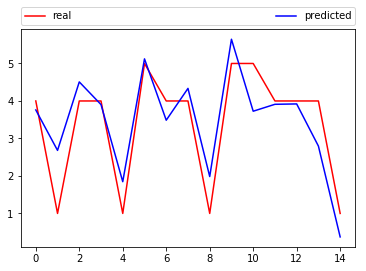

In [19]:
plt.plot(y_test[:count], color='red', label="real")
plt.plot(enet.predict(x_test[:count]), color='blue', label="predicted")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)


In [11]:
from sklearn.feature_extraction.text import HashingVectorizer

hv = HashingVectorizer(stop_words='english', n_features=4000, lowercase=True)
hsparse = hv.fit_transform(docs["text"].values)
x2_train, x2_test, y2_train, y2_test = train_test_split(hsparse, docs["stars"].values, test_size=15000, random_state=42)
print(sparse[:1])

  (0, 1188)	0.207145610224
  (0, 3108)	0.117523399854
  (0, 2555)	0.288399088532
  (0, 2840)	0.156021683559
  (0, 1698)	0.321583583246
  (0, 3574)	0.113295798892
  (0, 3293)	0.23905156791
  (0, 3932)	0.200129148163
  (0, 1189)	0.282322974115
  (0, 1735)	0.229997037298
  (0, 2332)	0.165523756967
  (0, 1937)	0.277644430936
  (0, 2348)	0.133118619887
  (0, 3847)	0.150095226639
  (0, 1167)	0.32905807413
  (0, 524)	0.286676459338
  (0, 3054)	0.266901082152
  (0, 283)	0.288574940575


(500, 1.3150113629392191, 1.2751917197754357)
(1000, 1.1779196318636256, 1.1047461056518038)
(1500, 1.1215737944372426, 1.0247610139649019)
(2000, 1.0857166781403527, 0.95196996719527816)
(2500, 1.054551387848226, 0.8957831958124004)
(3000, 1.045392505027166, 0.86636515830043159)
(3500, 1.0304064512001927, 0.81235554331581183)
(4000, 1.0430380008070046, 0.79036076311694314)
(4500, 1.0489316838810916, 0.77089708972465043)
(5000, 1.0360775465229581, 0.73578392833546524)
(5500, 1.0422137528326612, 0.71495749508154061)


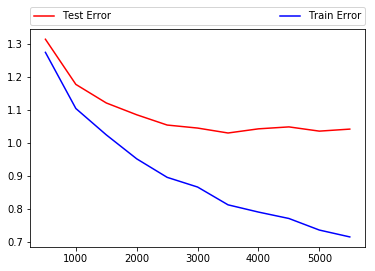

In [12]:
def listMSE2():
    mseX = []
    mseY = []
    tErr = []
    limits = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500]
    for limit in limits:
        vectorizer = HashingVectorizer(stop_words='english', n_features=limit, lowercase=True)
        sparse = vectorizer.fit_transform(docs["text"])
        x, x1, y, y1 = train_test_split(sparse, docs["stars"], test_size=15000, random_state=42)
        r = LinearRegression()
        r.fit(x, y)
        mse = np.mean((r.predict(x1) - y1) ** 2)
        tError = np.mean((r.predict(x) - y) ** 2)
        mseX.append(limit)
        mseY.append(mse)
        tErr.append(tError)
        print(limit, mse, tError)
        
    plt.plot(mseX, mseY, color='red', label="Test Error")
    plt.plot(mseX, tErr, color='blue', label="Train Error")
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
    

listMSE2()

In [21]:
from sklearn.externals import joblib
joblib.dump(regr, '../regr.pkl') 

['../regr.pkl']

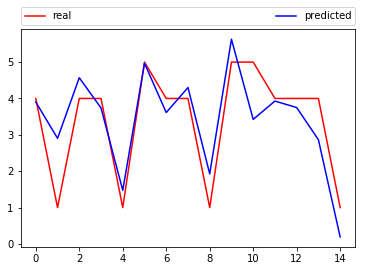

In [22]:
regrLoad = joblib.load('../regr.pkl')

plt.plot(y_test[:count], color='red', label="real")
plt.plot(regrLoad.predict(x_test[:count]), color='blue', label="predicted")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)